In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("../data/n_projs/experiment_results.csv")
projection_count = "# Projections"

metrics = ['Dice 3D [%]', 'IoU 3D [%]', 'Chamfer distance 3D [mm]']
df

,Unnamed: 0,Vessel,# Projections,Time [s],Dice 3D [%],IoU 3D [%],Chamfer distance 3D [mm],Avg IoU 2D [%],Avg Dice 2D [%]
0,0,moderate:0,1,1.349755,12.879284,6.882874,9.975252,NaN,NaN
1,1,moderate:0,1,1.305100,11.889512,6.320494,11.634138,NaN,NaN
2,2,moderate:0,1,1.472955,12.534406,6.686244,10.549314,NaN,NaN
3,3,moderate:0,1,1.206045,14.262636,7.678926,9.654581,NaN,NaN
4,4,moderate:0,1,1.295656,12.811236,6.844020,9.456670,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1495,1495,moderate:0,15,1.228187,77.839851,63.719512,0.546102,NaN,NaN
1496,1496,moderate:0,15,1.221364,79.120879,65.454545,0.525957,NaN,NaN
1497,1497,moderate:0,15,1.399480,78.676471,64.848485,0.539019,NaN,NaN
1498,1498,moderate:0,15,1.241236,78.228782,64.242424,0.546401,NaN,NaN


In [5]:
df_grouped = df.groupby(projection_count)[metrics].agg(['mean', 'var']).reset_index()
df_grouped

# Projections Dice 3D [%]            IoU 3D [%]             \
                        mean        var       mean        var   
0              1   12.189218   1.306084   6.494067   0.420913   
1              2   48.342106  98.516938  32.421050  71.183399   
2              3   68.399299  79.994870  52.618883  92.650603   
3              4   77.863673  20.849012  63.967293  34.143421   
4              5   80.299454   8.578861  67.178909  15.500196   
5              6   81.682333   2.081107  69.060982   4.128399   
6              7   81.219459   1.265758  68.392658   2.529190   
7              8   81.165965   1.223063  68.316391   2.456965   
8              9   80.632695   0.886924  67.560372   1.740630   
9             10   80.290307   0.901087  67.081266   1.761099   
10            11   79.881391   1.020010  66.513769   1.967329   
11            12   79.381452   0.796807  65.820971   1.507165   
12            13   79.095132   1.008459  65.430633   1.896224   
13            14   78.556221   1.177567  64.698337   2.186574   
14            15   78.512373   0.957478  64.636423   1.768974   

   Chamfer distance 3D [mm]            
                       mean       var  
0                 10.654690  1.861332  
1                  3.505294  2.329978  
2                  1.597402  0.868471  
3                  0.820572  0.120444  
4                  0.635714  0.031500  
5                  0.519951  0.005147  
6                  0.516600  0.002583  
7                  0.505898  0.001229  
8                  0.508336  0.000573  
9                  0.512510  0.000567  
10                 0.516935  0.000633  
11                 0.525587  0.000395  
12                 0.528595  0.000540  
13                 0.540776  0.000622  
14                 0.540915  0.000466

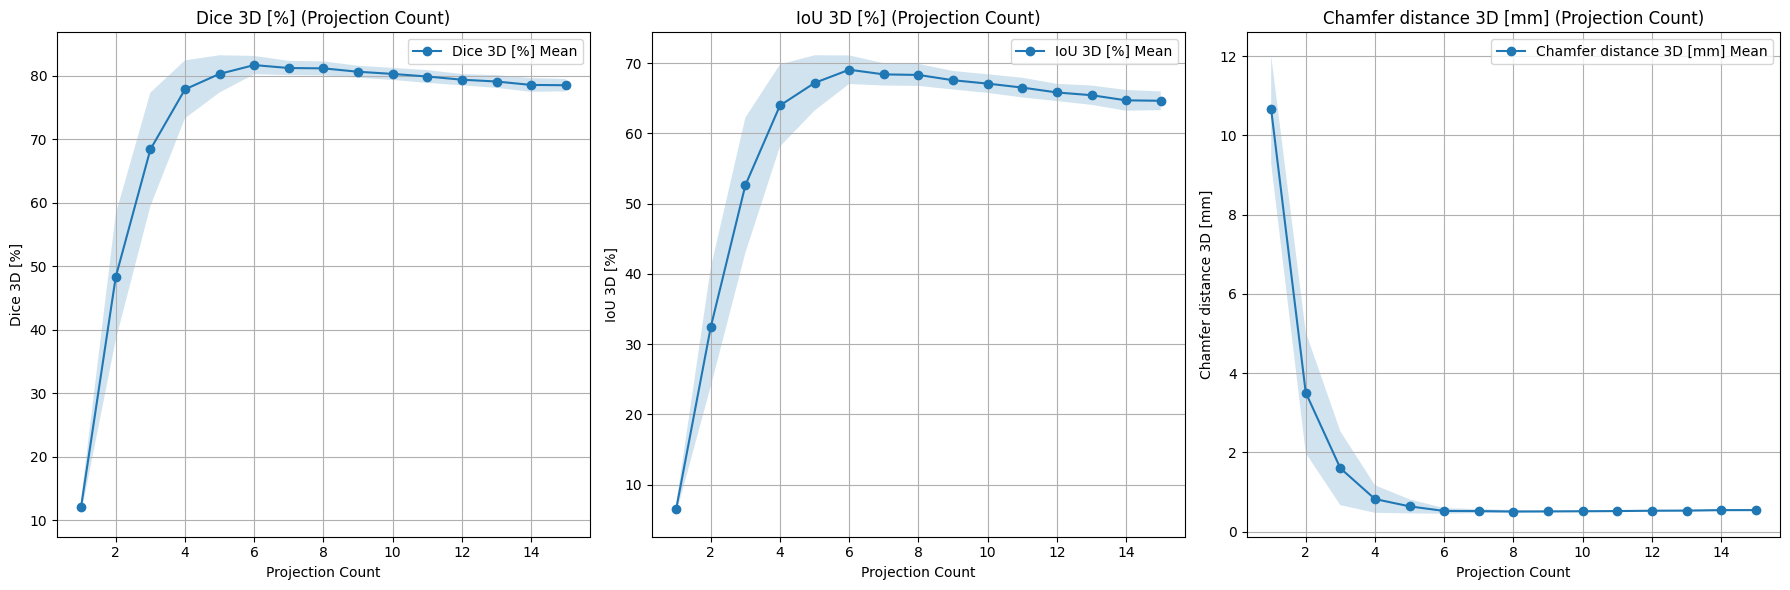

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics[:3]):
    mean_values = df_grouped[(metric, 'mean')]
    var_values = df_grouped[(metric, 'var')]
    axes[i].plot(df_grouped[projection_count], mean_values, label=f'{metric} Mean', marker='o')
    axes[i].fill_between(df_grouped[projection_count], 
                          mean_values - var_values**0.5, 
                          mean_values + var_values**0.5, 
                          alpha=0.2)
    axes[i].set_title(f'{metric} (Projection Count)')
    axes[i].set_xlabel('Projection Count')
    axes[i].set_ylabel(metric)
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.savefig('figures/metric_n_projs.png')
plt.show()